In [1]:
from pylab import *
from sklearn import cross_validation, tree
from toolbox_02450 import feature_selector_lr, bmplot
import sklearn.linear_model as lm
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np


#print plots inline
%matplotlib inline

#Define names
names = ['word_freq_make', 'word_freq_address', 'word_freq_all',
         'word_freq_3d', 'word_freq_our', 'word_freq_over',
         'word_freq_remove', 'word_freq_internet', 'word_freq_order',
         'word_freq_mail', 'word_freq_receive', 'word_freq_will',
         'word_freq_people', 'word_freq_report', 'word_freq_addresses',
         'word_freq_free', 'word_freq_business', 'word_freq_email',
         'word_freq_you', 'word_freq_credit', 'word_freq_your',
         'word_freq_font', 'word_freq_000', 'word_freq_money',
         'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
         'word_freq_650', 'word_freq_lab', 'word_freq_labs',
         'word_freq_telnet', 'word_freq_857', 'word_freq_data',
         'word_freq_415', 'word_freq_85', 'word_freq_technology',
         'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
         'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
         'word_freq_original', 'word_freq_project', 'word_freq_re',
         'word_freq_edu', 'word_freq_table', 'word_freq_conference',
         'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
         'char_freq_$', 'char_freq_#']
tst=['capital_run_length_average', 'capital_run_length_longest',
     'capital_run_length_total']

#clean up names
names=[s.replace('word_freq_','').replace('char_freq_','') for s in names]

#Load data
freq = pd.read_csv("../data/spambase.data",names=names,usecols=range(54))
Y = pd.read_csv("../data/spambase.data",usecols=[57],names=['spam'])

freq.head()


/usr/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,make,address,all,3d,our,over,remove,internet,order,mail,...,re,edu,table,conference,;,(,[,!,$,#
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000


In [2]:
fff= 12
loss=0.27
#Get data and standardize
df = pd.read_csv("../data/spambase.data",names=names+tst,usecols=range(57))
Xd = (df - df.mean()) / (df.max() - df.min())
Xd=Xd.iloc[:,:fff]
X = asmatrix(Xd)
y = Y.spam.values
X = np.asmatrix(X)
y = np.asmatrix(y).T

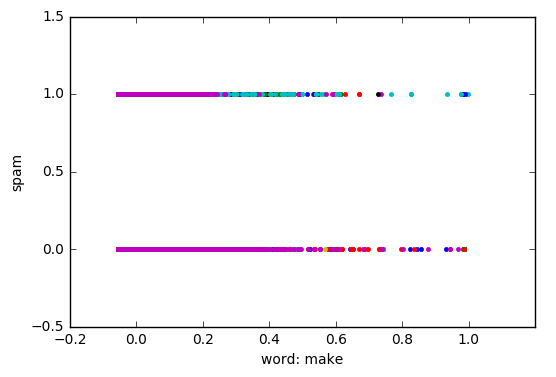

In [3]:
# Parameters
Xr=X[:,0]
Km = 1 # no of terms for regression model
Xe = np.mat(linspace(-0.1,1,1000)).T


# Plot original data and the model output
f = figure()
f.hold(True)
plot(X,y,'.')
xlabel('word: make'); ylabel('spam'); ylim(-0.5,1.5); xlim(-0.2,1.2)
savefig('img/make_spam.pdf')
show()


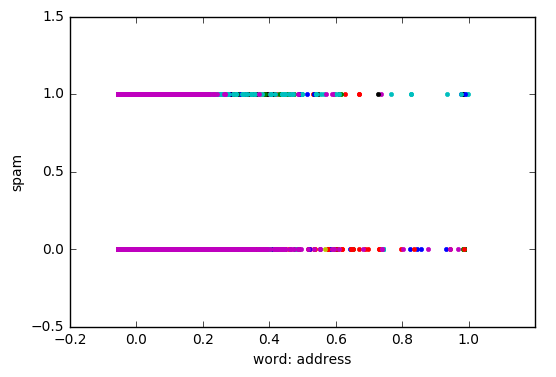

In [4]:
# Parameters
Xr=X[:,1]
Km = 1 # no of terms for regression model
Xe = np.mat(linspace(-0.1,1,1000)).T


# Plot original data and the model output
f = figure()
f.hold(True)
plot(X,y,'.')
xlabel('word: address'); ylabel('spam'); ylim(-0.5,1.5); xlim(-0.2,1.2)
savefig('img/address_spam.pdf')
show()


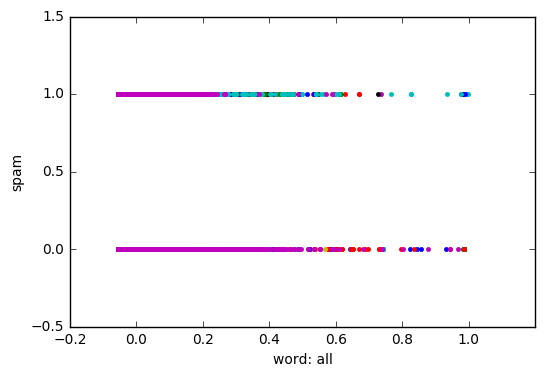

In [5]:
# Parameters
Xr=X[:,2]
Km = 1 # no of terms for regression model
Xe = np.mat(linspace(-0.1,1,1000)).T


# Plot original data and the model output
f = figure()
f.hold(True)
plot(X,y,'.')
xlabel('word: all'); ylabel('spam'); ylim(-0.5,1.5); xlim(-0.2,1.2)
savefig('img/all_spam.pdf')
show()

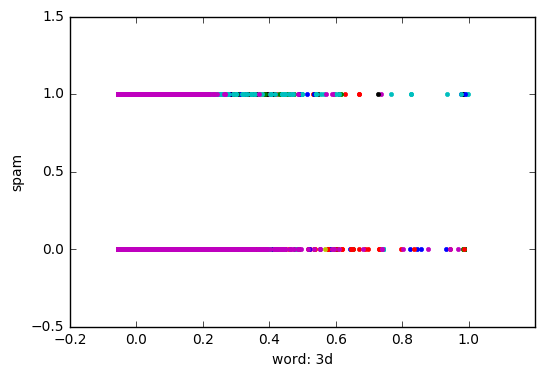

In [6]:
# Parameters
Xr=X[:,3]

# Plot original data and the model output
f = figure()
f.hold(True)
plot(X,y,'.')
xlabel('word: 3d'); ylabel('spam'); ylim(-0.5,1.5); xlim(-0.2,1.2)
savefig('img/3d_spam.pdf')
show()

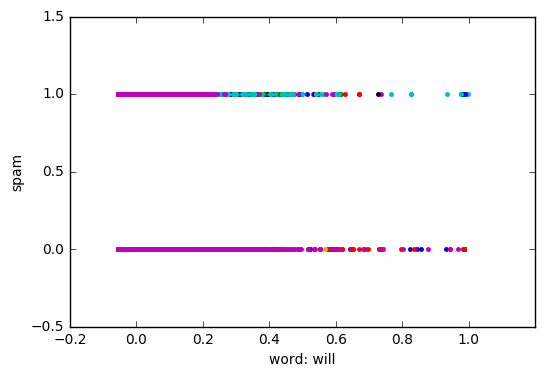

In [7]:
# Parameters
Xr=X[:,11]
Km = 1 # no of terms for regression model
Xe = np.mat(linspace(-0.1,1,1000)).T


# Plot original data and the model output
f = figure()
f.hold(True)
plot(X,y,'.')
xlabel('word: will'); ylabel('spam'); ylim(-0.5,1.5); xlim(-0.2,1.2)
savefig('img/will_spam.pdf')
show()

In [8]:
#attributeNames = [name[0] for name in names]
#classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
# Add offset attribute
X = np.concatenate((np.ones((X.shape[0],1)),X),1)
attributeNames = [u'Offset']+names[:fff]
M = M+1

## Crossvalidation
# Create crossvalidation partition for evaluation
K = 10
CV = cross_validation.KFold(N,K,shuffle=True)

# Initialize variables
Features = np.zeros((M,K))
Error_train = np.empty((K,1))
Error_test = np.empty((K,1))
Error_train_fs = np.empty((K,1))
Error_test_fs = np.empty((K,1))
Error_train_nofeatures = np.empty((K,1))
Error_test_nofeatures = np.empty((K,1))

k = 0
best_error = 1e32
best_k = 0
best_loss = []
best_rec = []
best_selected_features = []


In [9]:
for train_index, test_index in CV:
    # extract training and test set for current CV fold
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    internal_cross_validation = 10

    # Compute squared error without using the input data at all
    Error_train_nofeatures[k] = np.square(y_train - y_train.mean()).sum() / y_train.shape[0]
    Error_test_nofeatures[k] = np.square(y_test - y_test.mean()).sum() / y_test.shape[0]

    # Compute squared error with all features selected (no feature selection)
    m = lm.LinearRegression().fit(X_train, y_train)
    Error_train[k] = np.square(y_train - m.predict(X_train)).sum() / y_train.shape[0]
    Error_test[k] = np.square(y_test - m.predict(X_test)).sum() / y_test.shape[0]

    # Compute squared error with feature subset selection
    selected_features, features_record, loss_record = feature_selector_lr(X_train, y_train, internal_cross_validation,loss_record=[loss])
    Features[selected_features, k] = 1
    # .. alternatively you could use module sklearn.feature_selection
    print(selected_features)
    m = lm.LinearRegression().fit(X_train[:, selected_features], y_train)
    Error_train_fs[k] = np.square(y_train - m.predict(X_train[:, selected_features])).sum() / y_train.shape[0]
    Error_test_fs[k] = np.square(y_test - m.predict(X_test[:, selected_features])).sum() / y_test.shape[0]

#    print('Test error for ', k, ': ', Error_test_fs[k])

    if Error_test_fs[k] < best_error:
        best_error = Error_test_fs[k]
        best_k = k
        best_loss = loss_record
        best_rec = features_record
        best_selected_features = selected_features

    print('Cross validation fold {0}/{1}'.format(k + 1, K))
    # print('Train indices: {0}'.format(train_index))
    # print('Test indices: {0}'.format(test_index))
    print('Features no: {0}\n'.format(selected_features.size))

    k += 1

0.27
0.293316322694
0.288363593436
0.361366322759
0.280337949307
0.295396651016
0.272840499783
0.278176867902
0.256273575467
0.279830518613
0.276078286033
0.287844912767
0.275547623976
0.293737385991
0.256273575467
0.256273575467
0.251680956731
0.296229711797
0.245712874525
0.259240463947
0.244126541103
0.24436084576
0.244393794325
0.242141038829
0.252600703004
0.246568349154
0.256669859044
0.242141038829
0.242141038829
0.239148346332
0.272384017162
0.233854585545
0.243662442044
0.230521112041
0.232877760827
0.232356158181
0.240010422849
0.235347470167
0.242500590754
0.230521112041
0.230521112041
0.22777556353
0.255996203558
0.223535503661
0.23246672883
0.222107883783
0.221289186053
0.22864313797
0.224382476023
0.230849577723
0.221289186053
0.221289186053
0.218393753572
0.245394911788
0.214381360664
0.223295693683
0.213753671407
0.219977918383
0.216696589255
0.221606945613
0.213753671407
0.213753671407
0.211219873939
0.237022054165
0.207795611929
0.215384616652
0.212389614847
0.2093713

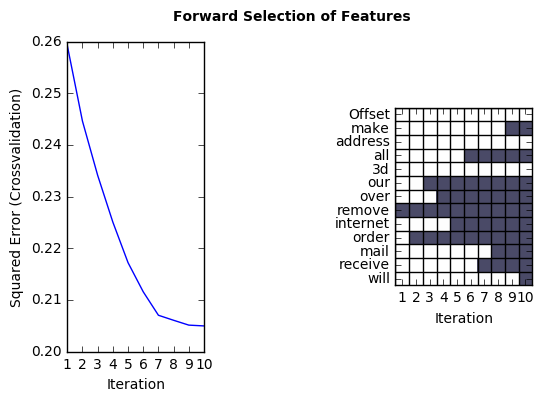

In [10]:
def plot_feature_selection(loss, attribute_names, feature_records):
    figure()
    suptitle('Forward Selection of Features', fontweight='bold')

    subplot(1, 3, 1)
    plot(range(1, len(loss)), loss[1:])
    locs, labels = xticks()
    xticks(locs, map(lambda x: "%1.0f" % x, locs))
    xlabel('Iteration')
    ylabel('Squared Error (Crossvalidation)')

    subplot(1, 3, 3)
    bmplot(attribute_names, range(1, feature_records.shape[1]), -feature_records[:, 1:])
    clim(-1.5, 0)
    xlabel('Iteration')
    savefig('img/best_forward_selection.pdf')

plot_feature_selection(best_loss, attributeNames, best_rec)



Linear regression without feature selection:

- Training error: 0.1673073597006846
- Test error:     0.16923848679867007
- R^2 train:     0.2992965518268113
- R^2 test:     0.2905136603427594
Linear regression with feature selection:

- Training error: 0.16814876751926583
- Test error:     0.1701178001926434
- R^2 train:     0.2957726341650031
- R^2 test:     0.28682737802540514


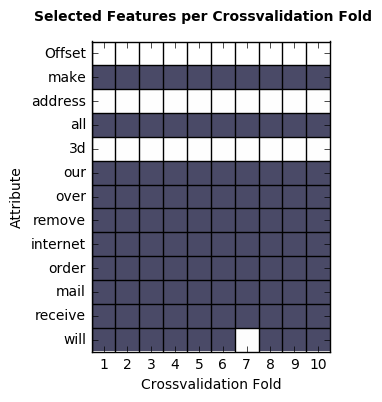

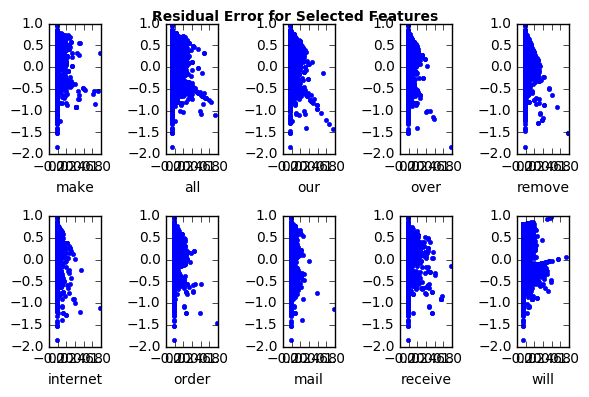

In [26]:
# Display results
print('\n')
print('Linear regression without feature selection:\n')
print('- Training error: {0}'.format(Error_train.mean()))
print('- Test error:     {0}'.format(Error_test.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum() - Error_train.sum()) / Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum() - Error_test.sum()) / Error_test_nofeatures.sum()))
print('Linear regression with feature selection:\n')
print('- Training error: {0}'.format(Error_train_fs.mean()))
print('- Test error:     {0}'.format(Error_test_fs.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum() - Error_train_fs.sum()) / Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum() - Error_test_fs.sum()) / Error_test_nofeatures.sum()))

figure(k)
#subplot(1, 3, 2)
suptitle('Selected Features per Crossvalidation Fold', fontweight='bold')
bmplot(attributeNames, range(1, Features.shape[1] + 1), -Features)
clim(-1.5, 0)
xlabel('Crossvalidation Fold')
ylabel('Attribute')
savefig('img/linear_k_fold.pdf')

# Inspect selected feature coefficients effect on the entire dataset and
# plot the fitted model residual error as function of each attribute to
# inspect for systematic structure in the residual
for f in range(best_k, best_k+1):
    # f = 2  # cross-validation fold to inspect
    ff = Features[:, f - 1].nonzero()[0]
    m = lm.LinearRegression().fit(X[:, ff], y)

    y_est = m.predict(X[:, ff])
    residual = y - y_est

    figure(k + f)
    figsize=(10,4)
    suptitle('Residual Error for Selected Features', fontweight='bold')
    for i in range(0, 5):
        subplot(2, ceil(len(ff) / 2.0), i + 1)
        plot(X[:, ff[i]], residual, '.')
        xlabel(attributeNames[ff[i]])
        tight_layout()
        savefig('img/residual_error.pdf')
        
    for i in range(5, len(ff)):
        subplot(2, ceil(len(ff) / 2.0), i + 1)
        plot(X[:, ff[i]], residual, '.')
        xlabel(attributeNames[ff[i]])
        tight_layout()
        savefig('img/residual_error.pdf')
    
show()

## 